## Solar burst on  2020.06.04  at  12:26:40 UTC   (15:26:40 UTC+3)

### GURT beam code according to UV-log at this time: 
#### UTC+3: 4/6/2020 15:26:15.004 U= A V= 4  #C9C5
# Find what code correspondes to this line!!!

### Import libraries

In [22]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
from scipy import ndimage

### Reading the data from txt file

In [11]:
filename = 'DATA/A200604_105919.adr_12-26-30 - 12-27-10.txt'
file = open(filename, 'r')
param = []
for line in file:
    num = line.rstrip().split()
    floatnum = [float(i) for i in num]
    param.append(floatnum)
file.close()
param = np.array((param))

print ('  Shape of the array: ', param.shape)

  Shape of the array:  (2048, 400)


### Show the dynamic spectra of the burst with normalized frequency response

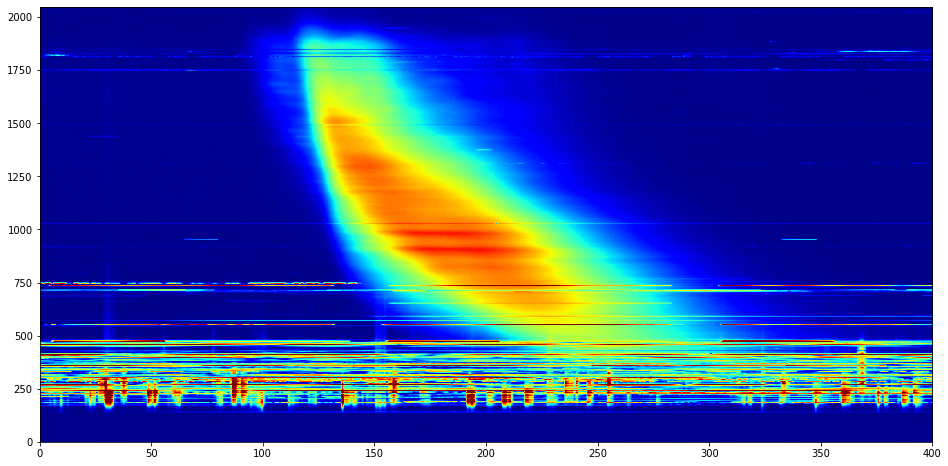

In [18]:
v_min = 0
v_max = 15
fig = plt.figure(figsize=(16.0, 8.0))
ax1 = fig.add_subplot(111)
im1 = ax1.imshow(np.flipud(param), aspect='auto', vmin=v_min, vmax=v_max, cmap='jet', \
                  extent=[0, param.shape[1], 0, param.shape[0]])

### Find the maximal data along time axis, in the areas free of RFI we assume that maximum corresponds to the maximum level of the burst

In [24]:
data = np.max(param, axis=1)

### Apply median filter to suppress the spikes from RFI

In [25]:
window_len = 60
fitered_data = ndimage.median_filter(data, size=window_len)

### The filtered responce (orange line) outside the area with strong RFI signals represents the maximal strength on the responce above the background

(0.0, 78.0)

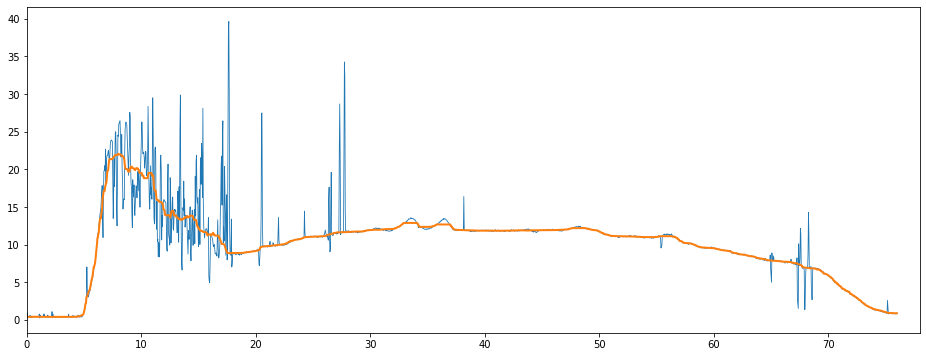

In [45]:
frequency = np.linspace(0, 76, 2048)
fig = plt.figure(figsize=(16.0, 6.0));
ax1 = fig.add_subplot(111);
ax1.plot(frequency, data, linewidth='0.80');
ax1.plot(frequency, fitered_data, linewidth='2.0');
ax1.set_xlim(xmin=0, xmax=78)
# pylab.savefig('Result.png', bbox_inches='tight', dpi = customDPI)

### Once more only filtered responce. Seems between 18 and 70 MHz (vertical red lines) we can suppose that this is the signal to noise ratio of our signal, i.e. the rate the brightness temperature of the burst exceeds the temperature of the background (9 dB at 18 MHz, 12 dB at 40 MHz and 6 dB at 70 MHz). The responce at frequencies higher 70 MHz we do no take into account as there is a strong effect of filters there. 

(0.0, 78.0)

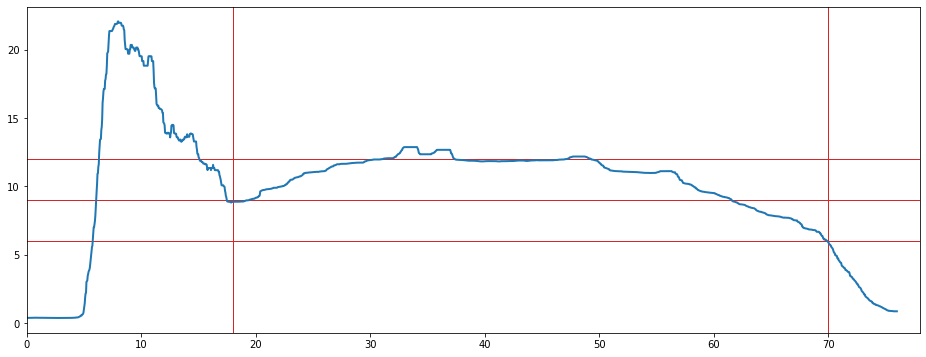

In [57]:
fig = plt.figure(figsize=(16.0, 6.0));
ax1 = fig.add_subplot(111);
ax1.axvline(x=18, linewidth=1, color='C3')
ax1.axvline(x=70, linewidth=1, color='C3')
ax1.axhline(y=9, linewidth=1, color='C3')
ax1.axhline(y=12, linewidth=1, color='C3')
ax1.axhline(y=6, linewidth=1, color='C3')
ax1.plot(frequency, fitered_data, linewidth='2.0');
ax1.set_xlim(xmin=0, xmax=78)